#### 0. Przygotowanie bibliotek i narzędzi.

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# przygotowanie danych
from sklearn.preprocessing import StandardScaler    # skalowanie zmiennych
from sklearn.model_selection import train_test_split    # podział na zbiór treningowy i testowy

# regresja liniowa
from sklearn.linear_model import LinearRegression

# metryki
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# random forest
from sklearn.ensemble import RandomForestRegressor

#### 1. Załadowanie danych z pliku ```tips.csv```.

In [5]:
file_path = "tips.csv"

In [124]:
df = pd.read_csv(file_path)

#### 2. Weryfikacja i ocena jakości danych.

In [8]:
len(df)

244

In [9]:
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [11]:
print("Podstawowe informacje o zbiorze danych:")
print(df.info())

Podstawowe informacje o zbiorze danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [12]:
# sprawdzenie brakujących wartości
print("Brakujące wartości w zbiorze danych:")
print(df.isnull().sum())

Brakujące wartości w zbiorze danych:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


**Uwaga: nie ma pustych wartości w zbiorze danych.**

In [14]:
print("\nStatystyki opisowe dla zmiennych liczbowych:\n")
df.describe()


Statystyki opisowe dla zmiennych liczbowych:



,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [15]:
for col in ['sex', 'smoker', 'day', 'time']:
    print(f"\nUnikalne wartości w {col}: {df[col].unique()}")


Unikalne wartości w sex: ['Female' 'Male']

Unikalne wartości w smoker: ['No' 'Yes']

Unikalne wartości w day: ['Sun' 'Sat' 'Thur' 'Fri']

Unikalne wartości w time: ['Dinner' 'Lunch']


**Uwaga: nie ma literówek w danych.**

In [17]:
sm = df[df["smoker"] == "Yes"]
max(sm["tip"] / sm["total_bill"] * 100)

71.0344827586207

In [18]:
df["tip_percentage"] = (df["tip"] / df["total_bill"]) * 100

**Uwaga: nowa kolumna z procentem napiwku.**

In [20]:
# sprawdzenie wartości odstających w zmiennych liczbowych (IQR method)
Q1 = df[["total_bill", "tip", "tip_percentage"]].quantile(0.25)
Q3 = df[["total_bill", "tip", "tip_percentage"]].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[["total_bill", "tip", "tip_percentage"]] < (Q1 - 1.5 * IQR)) |
            (df[["total_bill", "tip", "tip_percentage"]] > (Q3 + 1.5 * IQR)))

print("\nLiczba wartości odstających w zbiorze danych:")
print(outliers.sum())


Liczba wartości odstających w zbiorze danych:
total_bill        9
tip               9
tip_percentage    4
dtype: int64


In [21]:
outliers_total_bill = df[df["total_bill"] > 45]
print("\nRekordy z bardzo wysokim rachunkiem:")
print(outliers_total_bill)

outliers_tip = df[df["tip"] >= 9]
print("\nRekordy z bardzo wysokimi napiwkami:")
print(outliers_tip)


Rekordy z bardzo wysokim rachunkiem:
     total_bill    tip   sex smoker  day    time  size  tip_percentage
59        48.27   6.73  Male     No  Sat  Dinner     4       13.942407
156       48.17   5.00  Male     No  Sun  Dinner     6       10.379905
170       50.81  10.00  Male    Yes  Sat  Dinner     3       19.681165
182       45.35   3.50  Male    Yes  Sun  Dinner     3        7.717751
212       48.33   9.00  Male     No  Sat  Dinner     4       18.621974

Rekordy z bardzo wysokimi napiwkami:
     total_bill   tip   sex smoker  day    time  size  tip_percentage
170       50.81  10.0  Male    Yes  Sat  Dinner     3       19.681165
212       48.33   9.0  Male     No  Sat  Dinner     4       18.621974


**Uwaga: wartości odstajace sa poprawne, nie ma potrzeby ich usuwania.**

#### 3. Eksploracyjna Analiza Danych.

##### a) Rozkłady kwot rachunku i napiwków.

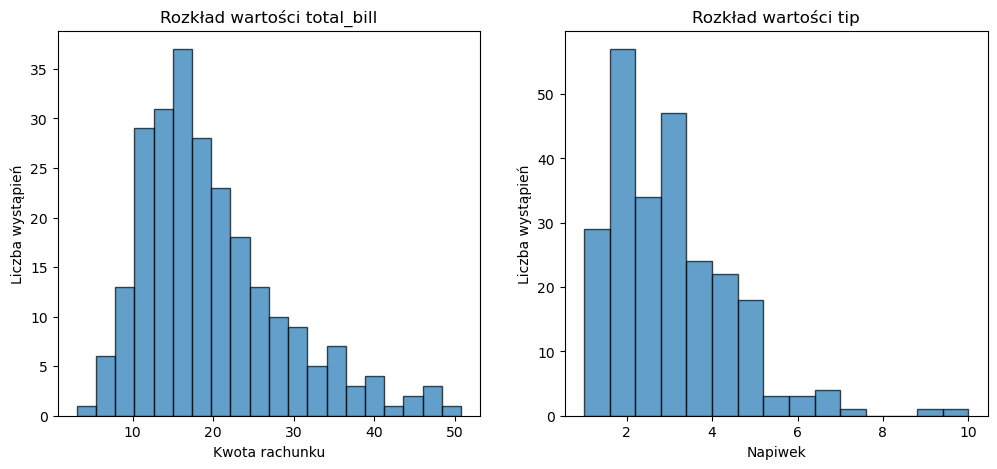

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df["total_bill"], bins=20, edgecolor="black", alpha=0.7)
axes[0].set_title("Rozkład wartości total_bill")
axes[0].set_xlabel("Kwota rachunku")
axes[0].set_ylabel("Liczba wystąpień")

axes[1].hist(df["tip"], bins=15, edgecolor="black", alpha=0.7)
axes[1].set_title("Rozkład wartości tip")
axes[1].set_xlabel("Napiwek")
axes[1].set_ylabel("Liczba wystąpień")

plt.show()

##### b) Rozkład procentu napiwku.

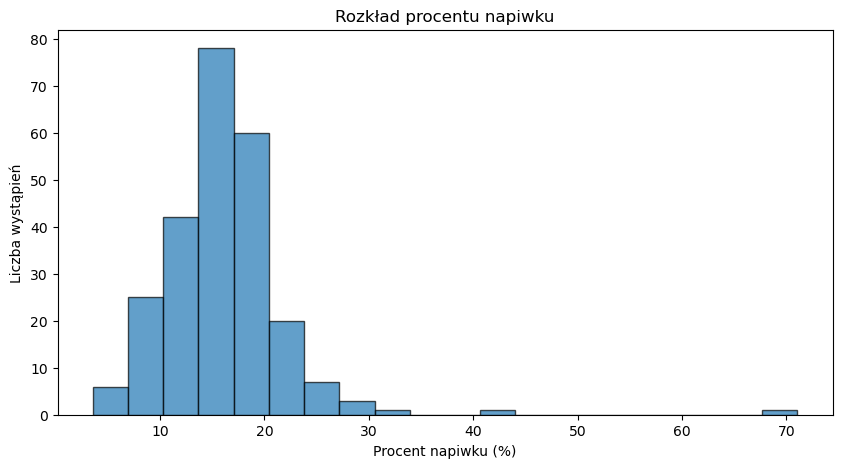

In [27]:
plt.figure(figsize=(10, 5))
plt.hist(df["tip_percentage"], bins=20, edgecolor="black", alpha=0.7)
plt.title("Rozkład procentu napiwku")
plt.xlabel("Procent napiwku (%)")
plt.ylabel("Liczba wystąpień")
plt.show()

In [28]:
# znalezienie rekordów z nietypowo wysokim napiwkiem
outliers_tip_percentage = df[df["tip_percentage"] > 40]
print("\nRekordy z podejrzanie wysokim procentem napiwku:")
print(outliers_tip_percentage)


Rekordy z podejrzanie wysokim procentem napiwku:
     total_bill   tip     sex smoker  day    time  size  tip_percentage
172        7.25  5.15    Male    Yes  Sun  Dinner     2       71.034483
178        9.60  4.00  Female    Yes  Sun  Dinner     2       41.666667


##### c) Jedna osoba przy stole (size = 1).

In [30]:
# znalezienie przypadków, gdzie size = 1
size_1_cases = df[df["size"] == 1]
print("\nRekordy, gdzie size = 1:")
print(size_1_cases)


Rekordy, gdzie size = 1:
     total_bill   tip     sex smoker   day    time  size  tip_percentage
67         3.07  1.00  Female    Yes   Sat  Dinner     1       32.573290
82        10.07  1.83  Female     No  Thur   Lunch     1       18.172790
111        7.25  1.00  Female     No   Sat  Dinner     1       13.793103
222        8.58  1.92    Male    Yes   Fri   Lunch     1       22.377622


##### d) Rozkład zmiennych liczbowych.

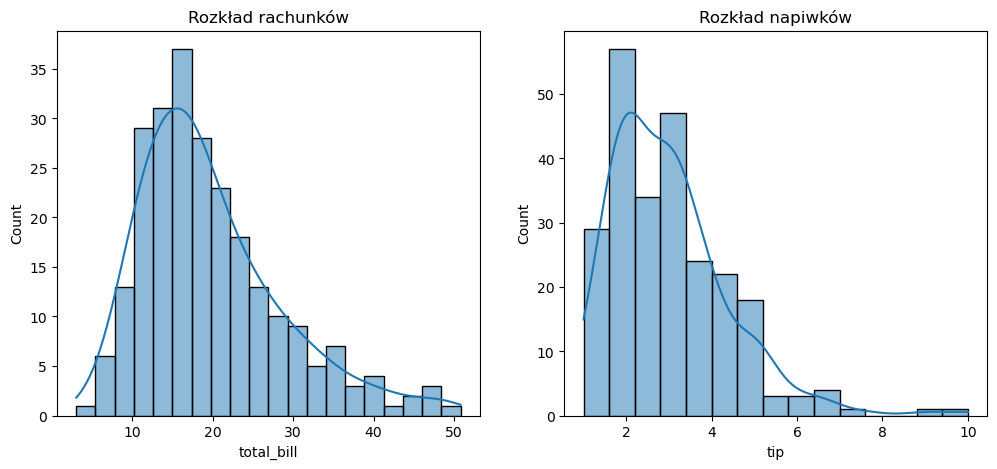

In [32]:
plt.figure(figsize=(12, 5))

# histogram rachunków
plt.subplot(1, 2, 1)
sns.histplot(df["total_bill"], bins=20, kde=True)
plt.title("Rozkład rachunków")

# histogram napiwków
plt.subplot(1, 2, 2)
sns.histplot(df["tip"], bins=15, kde=True)
plt.title("Rozkład napiwków")

plt.show()

##### e) Analiza korelacji.

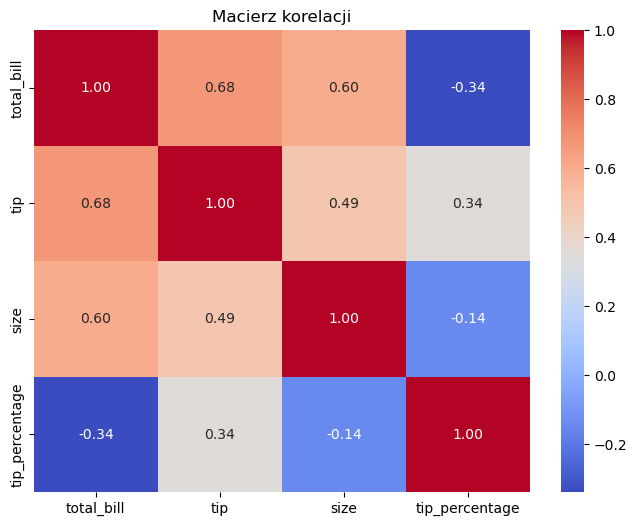

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["total_bill", "tip", "size", "tip_percentage"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji")
plt.show()

##### f) Analiza wpływu zmiennych kategorycznych.

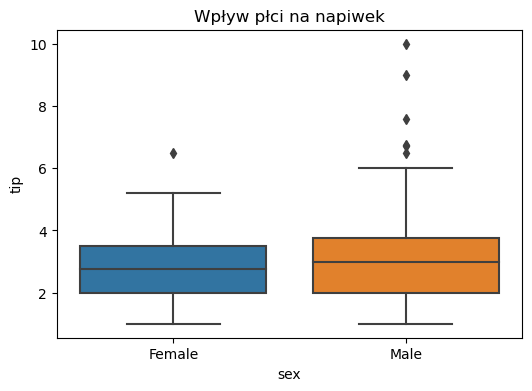

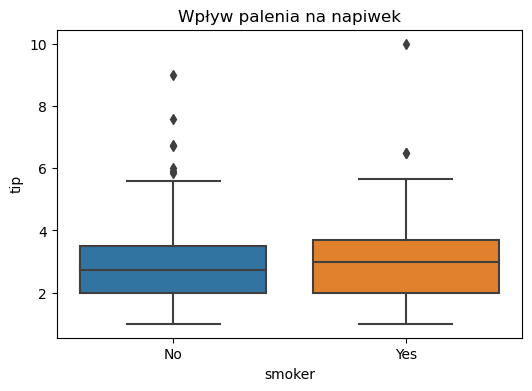

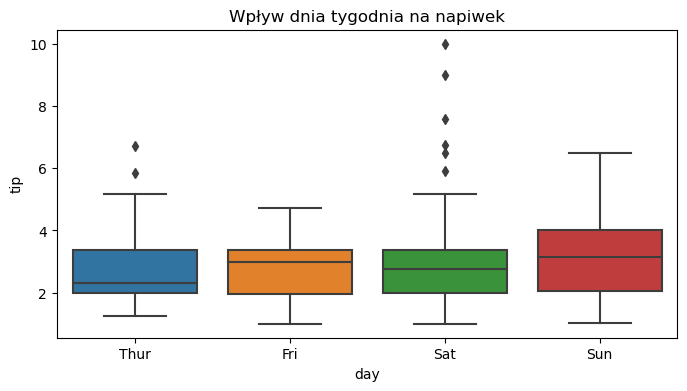

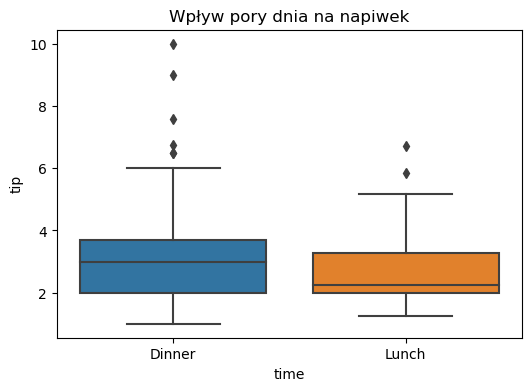

In [36]:
# wpływ płci na napiwek
plt.figure(figsize=(6, 4))
sns.boxplot(x="sex", y="tip", data=df)
plt.title("Wpływ płci na napiwek")
plt.show()

# wpływ palenia na napiwek
plt.figure(figsize=(6, 4))
sns.boxplot(x="smoker", y="tip", data=df)
plt.title("Wpływ palenia na napiwek")
plt.show()

# wpływ dnia tygodnia na napiwek
plt.figure(figsize=(8, 4))
sns.boxplot(x="day", y="tip", data=df, order=["Thur", "Fri", "Sat", "Sun"])
plt.title("Wpływ dnia tygodnia na napiwek")
plt.show()

# wpływ pory dnia na napiwek
plt.figure(figsize=(6, 4))
sns.boxplot(x="time", y="tip", data=df)
plt.title("Wpływ pory dnia na napiwek")
plt.show()

##### g) Analiza procentu napiwku.

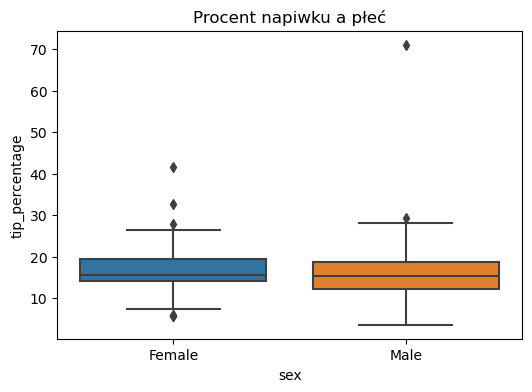

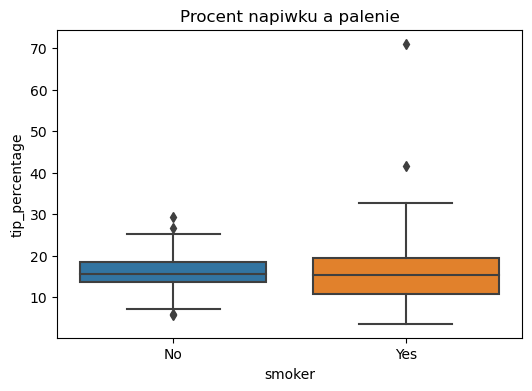

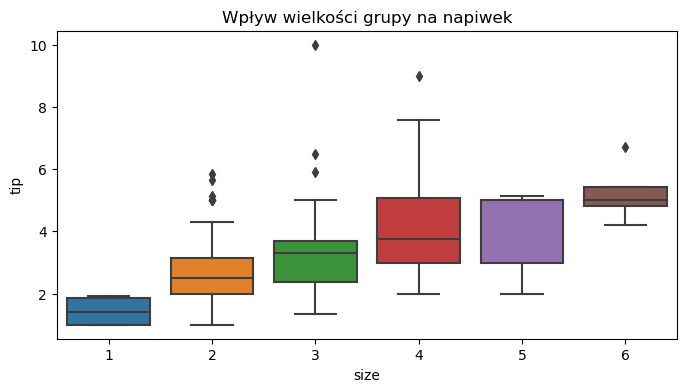

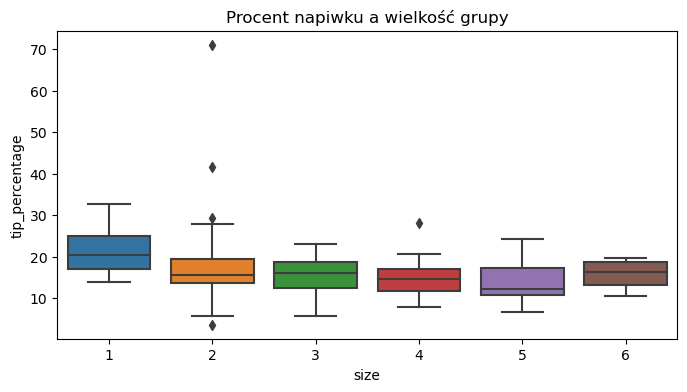

In [38]:
# wpływ płci na procent napiwku
plt.figure(figsize=(6, 4))
sns.boxplot(x="sex", y="tip_percentage", data=df)
plt.title("Procent napiwku a płeć")
plt.show()

# wpływ palenia na procent napiwku
plt.figure(figsize=(6, 4))
sns.boxplot(x="smoker", y="tip_percentage", data=df)
plt.title("Procent napiwku a palenie")
plt.show()

# wpływ wielkości grupy na napiwek
plt.figure(figsize=(8, 4))
sns.boxplot(x="size", y="tip", data=df)
plt.title("Wpływ wielkości grupy na napiwek")
plt.show()

# wpływ wielkości grupy na procent napiwku
plt.figure(figsize=(8, 4))
sns.boxplot(x="size", y="tip_percentage", data=df)
plt.title("Procent napiwku a wielkość grupy")
plt.show()

#### 4. Przygotowanie modeli.

##### a) Przygotowanie zmiennych.

In [41]:
# zakodowanie zmiennych kategorycznych (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "day", "time"], drop_first=True)

In [42]:
df_encoded.head()

,total_bill,tip,size,tip_percentage,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,5.944673,False,False,False,True,False,False
1,10.34,1.66,3,16.054159,True,False,False,True,False,False
2,21.01,3.50,3,16.658734,True,False,False,True,False,False
3,23.68,3.31,2,13.978041,True,False,False,True,False,False
4,24.59,3.61,4,14.680765,False,False,False,True,False,False


In [43]:
# wybór zmiennych do modelu
X = df_encoded.drop(columns=["tip"])  # cecha (features)
y = df_encoded["tip"]  # zmienna docelowa (target)

In [44]:
# skalowanie zmiennych liczbowych (opcjonalne, ale przydatne)
scaler = StandardScaler()
X[["total_bill", "size", "tip_percentage"]] = scaler.fit_transform(X[["total_bill", "size", "tip_percentage"]])

##### b) Podział zbioru na treningowy (80%) i testowy (20%).

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nRozmiary zbiorów danych:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Rozmiary zbiorów danych:
X_train: (195, 9), X_test: (49, 9)
y_train: (195,), y_test: (49,)


##### c) Model I - **Regresja Liniowa**.

In [48]:
# inicjalizacja modelu regresji liniowej
model = LinearRegression()

In [49]:
# trenowanie modelu
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# predykcja na zbiorze testowym
y_pred = model.predict(X_test)

In [51]:
# ocena jakości modelu
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.3488
Mean Squared Error (MSE): 0.2427
Root Mean Squared Error (RMSE): 0.4926
R-squared (R²): 0.8059


In [52]:
# sprawdzenie współczynników regresji (ważność cech)
coefficients = pd.DataFrame({"Feature": X_train.columns, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

print("\nWpływ cech na przewidywany napiwek:")
print(coefficients)


Wpływ cech na przewidywany napiwek:
          Feature  Coefficient
0      total_bill     1.225843
2  tip_percentage     0.905348
1            size     0.098880
3        sex_Male     0.039115
8      time_Lunch     0.032348
7        day_Thur    -0.049415
5         day_Sat    -0.051005
6         day_Sun    -0.229800
4      smoker_Yes    -0.334940


##### d) Model II - **Random Forest**.

In [54]:
# inicjalizacja modelu Random Forest z 100 drzewami
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

In [55]:
# trenowanie modelu
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [56]:
# predykcja na zbiorze testowym
y_rf_pred = rf_model.predict(X_test)

In [57]:
# ocena jakości modelu
mae_rf = mean_absolute_error(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
rmse_rf = mean_squared_error(y_test, y_rf_pred, squared=False)
r2_rf = r2_score(y_test, y_rf_pred)

print(f"MAE (Random Forest): {mae_rf:.4f}")
print(f"MSE (Random Forest): {mse_rf:.4f}")
print(f"RMSE (Random Forest): {rmse_rf:.4f}")
print(f"R² (Random Forest): {r2_rf:.4f}")

MAE (Random Forest): 0.2686
MSE (Random Forest): 0.2027
RMSE (Random Forest): 0.4502
R² (Random Forest): 0.8379


In [58]:
# ważność cech
importances_rf = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nWażność cech w Random Forest:")
print(importances_rf)


Ważność cech w Random Forest:
          Feature  Importance
0      total_bill    0.613204
2  tip_percentage    0.376517
1            size    0.004073
4      smoker_Yes    0.002380
3        sex_Male    0.001165
8      time_Lunch    0.000879
6         day_Sun    0.000751
5         day_Sat    0.000590
7        day_Thur    0.000440


#### 5. Ocena jakości i porównanie obu modeli.

##### a) Funkcja do oceny modelu.

In [61]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    print(f"\n=== Ocena modelu: {name} ===")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")

    # wykres - rzeczywiste vs przewidywane wartości
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.7)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.xlabel("Rzeczywiste wartości")
    plt.ylabel("Przewidywane wartości")
    plt.title(f"{name}: Rzeczywiste vs Przewidywane")
    plt.show()

    # histogram błędów (residuals)
    residuals = y_true - y_pred
    plt.figure(figsize=(8,5))
    sns.histplot(residuals, bins=20, kde=True)
    plt.axvline(0, color='red', linestyle='--')
    plt.xlabel("Błąd predykcji (Residual)")
    plt.ylabel("Liczba wystąpień")
    plt.title(f"{name}: Rozkład błędów")
    plt.show()

##### b) Ocena regresji liniowej.


=== Ocena modelu: Regresja Liniowa ===
Mean Absolute Error (MAE): 0.3488
Mean Squared Error (MSE): 0.2427
Root Mean Squared Error (RMSE): 0.4926
R-squared (R²): 0.8059


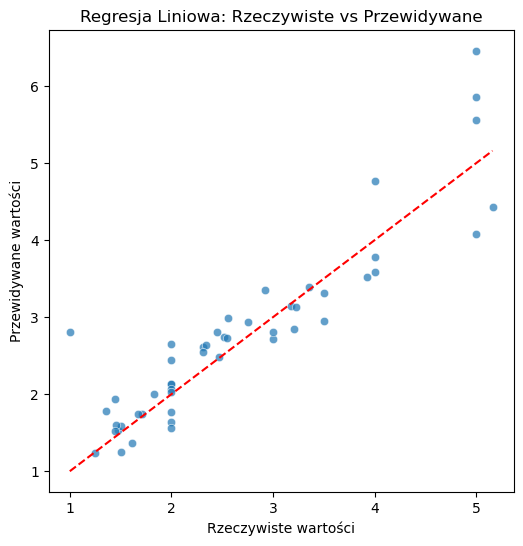

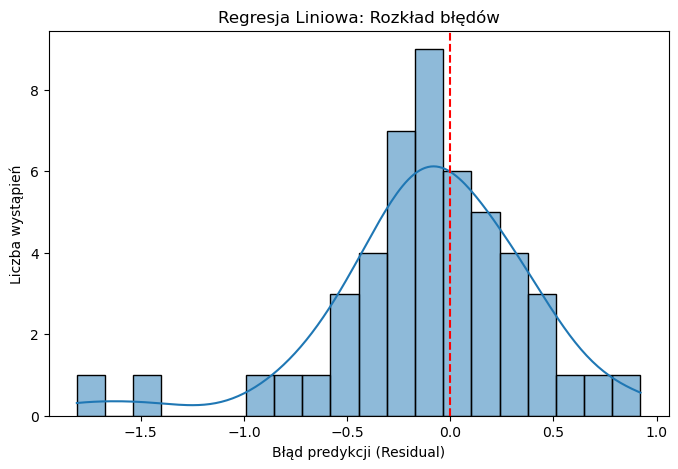

In [63]:
evaluate_model("Regresja Liniowa", y_test, y_pred)

##### c) Ocena random forest.


=== Ocena modelu: Random Forest ===
Mean Absolute Error (MAE): 0.2686
Mean Squared Error (MSE): 0.2027
Root Mean Squared Error (RMSE): 0.4502
R-squared (R²): 0.8379


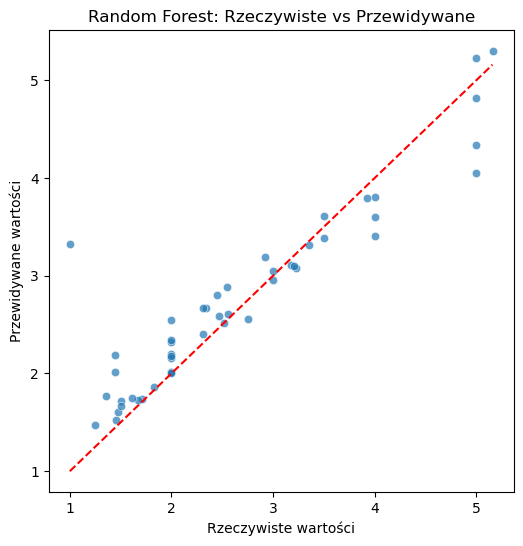

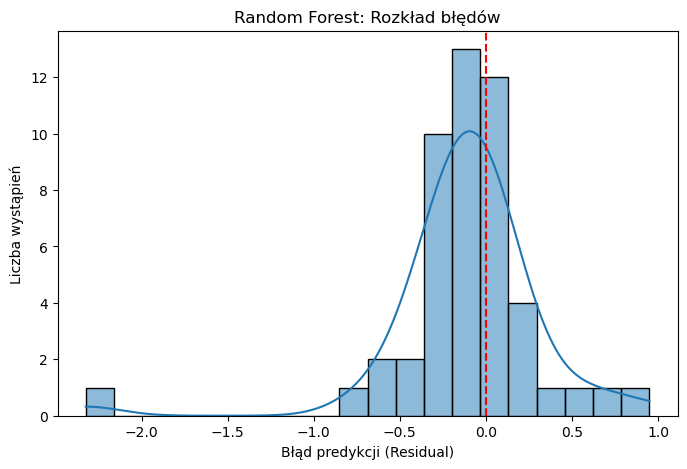

In [65]:
evaluate_model("Random Forest", y_test, y_rf_pred)